# Exploring MNIST dataset

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

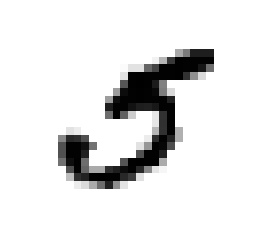

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[36000]

5.0

# Training a DNN using Plain TensorFlow
## Construction Phase

In [6]:
import tensorflow as tf

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer:
n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [7]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [8]:
# Create the two hidden layers and the output layer
#def neuron_layer(X, n_neurons, name, activation=None):
#   with tf.name_scope(name):
#        n_inputs = int(X.get_shape()[1])
#        stddev = 2 / np.sqrt(n_inputs)
#        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
#        W = tf.Variable(init, name="kernel")
#        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
#        Z = tf.matmul(X, W) + b
#        if activation is not None:
#            return activation(Z)
#        else:
#            return Z

In [9]:
#with tf.name_scope("dnn"):
#    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
#                           activation=tf.nn.relu)
#    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
#                          activation=tf.nn.relu)
#    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [10]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [11]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [12]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [13]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1) # returns a 1D tensor full of boolean values
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) #casting booleans to floats and then compute average

In [14]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

## Execution Phase

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./tmp/data/")

Extracting ./tmp/data/train-images-idx3-ubyte.gz
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz


In [16]:
n_epochs = 40
batch_size = 50

In [17]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.96 Test accuracy: 0.903
1 Train accuracy: 0.96 Test accuracy: 0.9224
2 Train accuracy: 0.92 Test accuracy: 0.9306
3 Train accuracy: 0.92 Test accuracy: 0.9385
4 Train accuracy: 0.98 Test accuracy: 0.9431
5 Train accuracy: 0.9 Test accuracy: 0.9464
6 Train accuracy: 0.98 Test accuracy: 0.9487
7 Train accuracy: 0.94 Test accuracy: 0.9517
8 Train accuracy: 0.98 Test accuracy: 0.9556
9 Train accuracy: 0.94 Test accuracy: 0.9558
10 Train accuracy: 1.0 Test accuracy: 0.9602
11 Train accuracy: 0.92 Test accuracy: 0.9617
12 Train accuracy: 1.0 Test accuracy: 0.9626
13 Train accuracy: 0.96 Test accuracy: 0.9628
14 Train accuracy: 0.98 Test accuracy: 0.9649
15 Train accuracy: 0.98 Test accuracy: 0.9659
16 Train accuracy: 0.96 Test accuracy: 0.9665
17 Train accuracy: 1.0 Test accuracy: 0.9677
18 Train accuracy: 1.0 Test accuracy: 0.9677
19 Train accuracy: 0.98 Test accuracy: 0.9691
20 Train accuracy: 1.0 Test accuracy: 0.9687
21 Train accuracy: 0.98 Test accuracy: 0.9699
22 Tr